In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import AutoMinorLocator

/var/folders/69/knkk0bvs2zj17g66y54b741c0000gn/T/ipykernel_95687/1127185074.py:72: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticklabels(), fontsize=12)
/var/folders/69/knkk0bvs2zj17g66y54b741c0000gn/T/ipykernel_95687/1127185074.py:72: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticklabels(), fontsize=12)
/var/folders/69/knkk0bvs2zj17g66y54b741c0000gn/T/ipykernel_95687/1127185074.py:72: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticklabels(), fontsize=12)


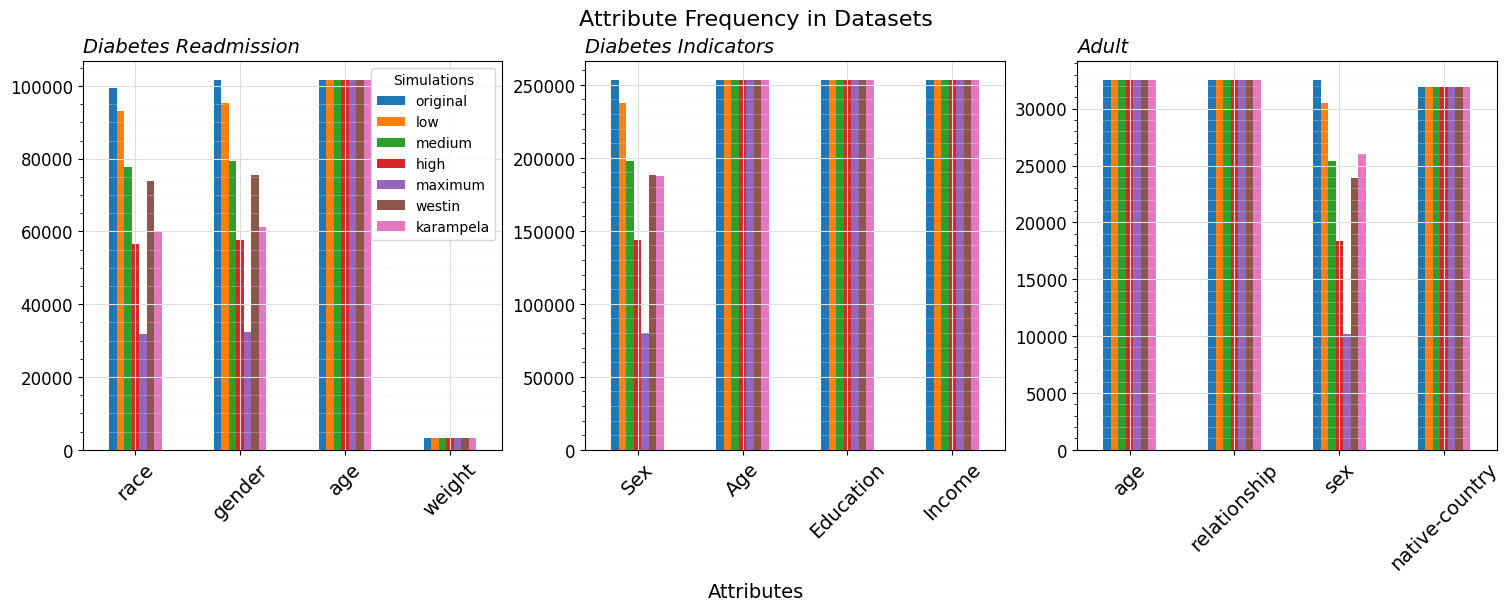

In [3]:
def missing_values(comp_dataset, ax):
    if comp_dataset == 'diabetes_130':
        orig_df = pd.read_csv('../diabetes_130/diabetic_data.csv')
    elif comp_dataset == 'diabetes_012':
        orig_df = pd.read_csv('../diabetes_012/diabetes_012_cleaned.csv')
    elif comp_dataset == 'adult':
        orig_df = pd.read_csv('../adult/adult_cleaned.csv')

    sim_df_low = pd.read_csv('../'+comp_dataset+'/simulations/low.csv')
    sim_df_medium = pd.read_csv('../'+comp_dataset+'/simulations/medium.csv')
    sim_df_high = pd.read_csv('../'+comp_dataset+'/simulations/high.csv')
    sim_df_maximum = pd.read_csv('../'+comp_dataset+'/simulations/maximum.csv')
    sim_df_westin = pd.read_csv('../'+comp_dataset+'/simulations/westin.csv')
    sim_df_karampela = pd.read_csv('../'+comp_dataset+'/simulations/karampela.csv')

    orig_df['amount_changed'] = pd.Series()
    orig_df['amount_changed'].fillna(0, inplace=True)

    count_attribute_values = pd.DataFrame(
        columns=['attribute', 'original']
    )

    for column in orig_df.columns:
        row_count_with_values = orig_df.loc[orig_df[column] != '?'].shape[0]
        count_attribute_values.loc[len(count_attribute_values.index)] = [column, row_count_with_values]

    def add_column(column_name, df):
        count_attribute_values[column_name] = pd.Series()
        index = 0
        for column in df.columns:
            count_in_sim = df.loc[df[column] != '?'].shape[0]
            if column == orig_df[column].name:
                count_attribute_values.at[index, column_name] = count_in_sim
                index+=1
            else: 
                print('Error: column name mismatch')
                break

    add_column('low', sim_df_low)
    add_column('medium', sim_df_medium)
    add_column('high', sim_df_high)
    add_column('maximum', sim_df_maximum)
    add_column('westin', sim_df_westin)
    add_column('karampela', sim_df_karampela.drop(columns=['strictness']))

    if comp_dataset == 'diabetes_130':
        count_attribute_values.iloc[2:6].plot.bar(x='attribute', rot=0, ax = ax).legend(loc='upper right')
    elif comp_dataset == 'diabetes_012':
        count_attribute_values.iloc[18:22].plot.bar(x='attribute', rot=0, ax = ax).legend(loc='upper right')
    elif comp_dataset == 'adult':
        count_attribute_values.iloc[[0,7,9,13]].plot.bar(x='attribute', rot=0, ax = ax).legend(loc='upper right')





fig = plt.figure(figsize=(15, 6), layout='constrained')
ax_array = fig.subplots(1, 3, squeeze=False, sharey=False, sharex=False)
missing_values('diabetes_130', ax_array[0, 0])
missing_values('diabetes_012', ax_array[0, 1])
missing_values('adult', ax_array[0, 2])

names = ['Diabetes Readmission', 'Diabetes Indicators', 'Adult']
for ax, name in zip(ax_array.flat, names):
    ax.grid(which='major', color='#DDDDDD', linewidth=0.8)
    ax.grid(which='minor', color='#EEEEEE', linestyle=':', linewidth=0.5)
    ax.yaxis.set_minor_locator(AutoMinorLocator())
    ax.legend().remove()
    ax.set_title(name, loc='left', fontstyle='oblique', fontsize=14)
    ax.set_xlabel('')
    ax.set_xticklabels(ax.get_xticklabels(), fontsize=14, rotation=45)
    ax.set_yticklabels(ax.get_yticklabels(), fontsize=12)

ax_array[0,0].legend(fontsize=10, title='Simulations')
fig.suptitle('Attribute Frequency in Datasets', fontsize=16)
fig.supxlabel('Attributes', fontsize=14)
plt.show()